In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter



In [3]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.3 MB/s eta 0:00:00


In [4]:
import emoji


In [5]:
from google.colab import files
files.upload()


Saving _chat.txt to _chat (1).txt


{'_chat (1).txt': b'[12/01/26, 10:45:05\xe2\x80\xafAM] Interns - NFP National 2026: \xe2\x80\x8eMessages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them.\r\n[12/01/26, 10:45:05\xe2\x80\xafAM] Neha Mam NetworkFp HR: \xe2\x80\x8eNeha Mam NetworkFp HR created group \xe2\x80\x9cNFP National Summit 2026 Interns\xe2\x80\x9d\r\n[12/01/26, 10:45:06\xe2\x80\xafAM] Interns - NFP National 2026: \xe2\x80\x8eNeha Mam NetworkFp HR added you\r\n[12/01/26, 10:46:06\xe2\x80\xafAM] ~\xe2\x80\xafAditya Singh: \xe2\x80\x8eNeha Mam NetworkFp HR added ~\xe2\x80\xafAditya Singh\r\n[12/01/26, 10:50:11\xe2\x80\xafAM] ~\xe2\x80\xafPriti  Neelgund: \xe2\x80\x8eNeha Mam NetworkFp HR added ~\xe2\x80\xafPriti  Neelgund\r\n[12/01/26, 11:02:39\xe2\x80\xafAM] Interns - NFP National 2026: \xe2\x80\x8eNeha Mam NetworkFp HR added \xe2\x80\xaa+91\xc2\xa087660\xc2\xa092965\xe2\x80\xac and \xe2\x80\xaa+91\xc2\xa099870\xc2\xa037191\xe2\x80\xac\r\n[12/01/26, 11:04:21\xe2\x80\xaf

In [6]:
with open('_chat.txt', 'r', encoding='utf-8') as f:
    data = f.read()

print(data[:1000])  # preview first 1000 characters


[12/01/26, 10:45:05 AM] Interns - NFP National 2026: ‎Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them.
[12/01/26, 10:45:05 AM] Neha Mam NetworkFp HR: ‎Neha Mam NetworkFp HR created group “NFP National Summit 2026 Interns”
[12/01/26, 10:45:06 AM] Interns - NFP National 2026: ‎Neha Mam NetworkFp HR added you
[12/01/26, 10:46:06 AM] ~ Aditya Singh: ‎Neha Mam NetworkFp HR added ~ Aditya Singh
[12/01/26, 10:50:11 AM] ~ Priti  Neelgund: ‎Neha Mam NetworkFp HR added ~ Priti  Neelgund
[12/01/26, 11:02:39 AM] Interns - NFP National 2026: ‎Neha Mam NetworkFp HR added ‪+91 87660 92965‬ and ‪+91 99870 37191‬
[12/01/26, 11:04:21 AM] ~ shree: ‎Neha Mam NetworkFp HR added ~ shree
[12/01/26, 11:15:42 AM] ~ Priti  Neelgund: ‎~ Priti  Neelgund changed the group name to “Interns - NFP National 2026”
[12/01/26, 11:36:50 PM] ~ Priti  Neelgund: ‎~ Priti  Neelgund was added
[12/01/26, 11:16:36 AM] ~ Aditya: ‎Neha Mam NetworkFp HR added ~ Aditya
[12/01/

In [8]:
pattern = r'(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][Mm])\s-\s'

messages = re.split(pattern, data)[1:]

dates = messages[::2]
msgs = messages[1::2]

df = pd.DataFrame({
    'date': dates,
    'user_message': msgs
})



In [9]:
users = []
messages = []

for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('Group Notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()


,date,user,message


In [22]:
pattern = r'(\d{1,2}[/-]\d{1,2}[/-]\d{2,4},?\s\d{1,2}:\d{2}(?:\s?[APap][Mm])?)'

messages = re.split(pattern, data)

# remove junk before first date
messages = messages[1:]

dates = messages[::2]
msgs = messages[1::2]

df = pd.DataFrame({
    'date': dates,
    'user_message': msgs
})



In [23]:
df.shape


(87, 2)

In [25]:
users = []
messages = []

for msg in df['user_message']:
    split = msg.split(': ', 1)
    if len(split) == 2:
        users.append(split[0])
        messages.append(split[1])
    else:
        users.append('Group Notification')
        messages.append(split[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()


,date,user,message
0,"12/01/26, 10:45",:05 AM] Interns - NFP National 2026,‎Messages and calls are end-to-end encrypted. ...
1,"12/01/26, 10:45",:05 AM] Neha Mam NetworkFp HR,‎Neha Mam NetworkFp HR created group “NFP Nati...
2,"12/01/26, 10:45",:06 AM] Interns - NFP National 2026,‎Neha Mam NetworkFp HR added you\n[
3,"12/01/26, 10:46",:06 AM] ~ Aditya Singh,‎Neha Mam NetworkFp HR added ~ Aditya Singh\n[
4,"12/01/26, 10:50",:11 AM] ~ Priti Neelgund,‎Neha Mam NetworkFp HR added ~ Priti Neelgund\n[


In [26]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

df.shape


/tmp/ipython-input-3186615629.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


(87, 3)

In [27]:
df['message'] = df['message'].astype(str)

total_messages = df.shape[0]
total_words = df['message'].apply(lambda x: len(x.split())).sum()

print("Total Messages:", total_messages)
print("Total Words:", total_words)


Total Messages: 87
Total Words: 1876


In [28]:
df['user'].value_counts()


,count
user,
:02 PM] Neha Mam NetworkFp HR,3
:35 PM] Neha Mam NetworkFp HR,2
:08 PM] ~ ‎Priya Srinivasan,2
:47 PM] Neha Mam NetworkFp HR,2
:11 AM] ~ Priti Neelgund,1
...,...
:26 AM] ~ Aditya Singh,1
:38 PM] ~ Priti Neelgund,1
:31 AM] ~ Aditya Singh,1


In [29]:
top_users = df[df['user'] != 'Group Notification']['user'].value_counts().head(5)
top_users


,count
user,
:02 PM] Neha Mam NetworkFp HR,3
:35 PM] Neha Mam NetworkFp HR,2
:08 PM] ~ ‎Priya Srinivasan,2
:47 PM] Neha Mam NetworkFp HR,2
:11 AM] ~ Priti Neelgund,1


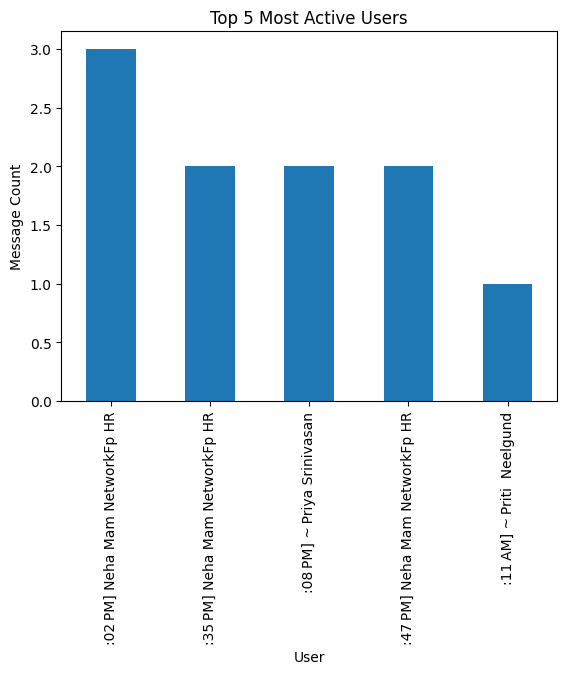

In [30]:
if not top_users.empty:
    top_users.plot(kind='bar')
    plt.title("Top 5 Most Active Users")
    plt.xlabel("User")
    plt.ylabel("Message Count")
    plt.show()
else:
    print("No user messages to plot.")


In [31]:
emojis = []

for msg in df['message']:
    emojis.extend([c for c in msg if c in emoji.EMOJI_DATA])

emoji_df = pd.DataFrame(Counter(emojis).most_common(10),
                        columns=['Emoji', 'Count'])
emoji_df


,Emoji,Count
0,📍,2
1,🕖,2
2,👍,2
3,🏻,2
4,🙌,2
5,❤,2
6,😊,2
7,👋,1
8,📌,1
9,🗓,1


In [32]:
words = []

for msg in df['message']:
    for word in msg.lower().split():
        words.append(word)

common_words = Counter(words).most_common(10)
common_words


[('[', 82),
 ('the', 46),
 ('to', 39),
 ('and', 37),
 ('you', 25),
 ('please', 24),
 ('for', 23),
 ('all', 23),
 ('a', 21),
 ('of', 21)]

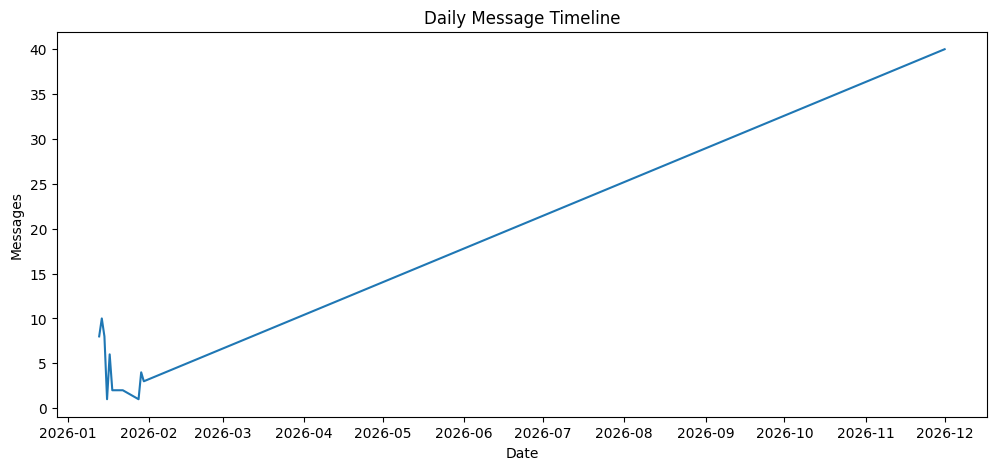

In [33]:
timeline = df.groupby(df['date'].dt.date).count()['message']

timeline.plot(figsize=(12,5))
plt.title("Daily Message Timeline")
plt.xlabel("Date")
plt.ylabel("Messages")
plt.show()


In [36]:
df.columns


Index(['date', 'user', 'message'], dtype='object')

In [37]:
df['hour'] = df['date'].dt.hour


In [38]:
df['day_name'] = df['date'].dt.day_name()


In [39]:
df[['date', 'hour']].head()


,date,hour
0,2026-12-01 10:45:00,10
1,2026-12-01 10:45:00,10
2,2026-12-01 10:45:00,10
3,2026-12-01 10:46:00,10
4,2026-12-01 10:50:00,10


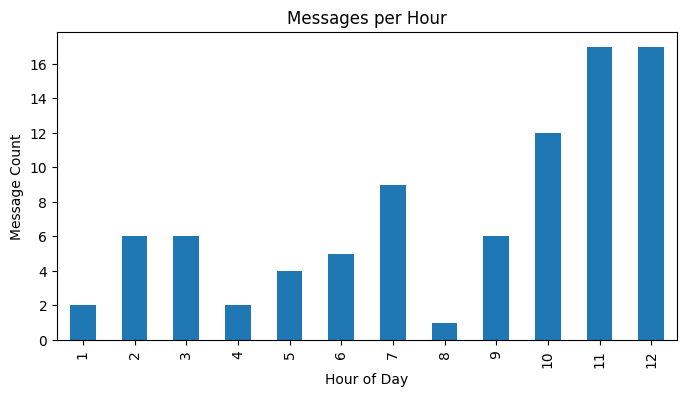

In [40]:
hourly = df.groupby('hour')['message'].count()

hourly.plot(kind='bar', figsize=(8,4))
plt.title("Messages per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Message Count")
plt.show()
